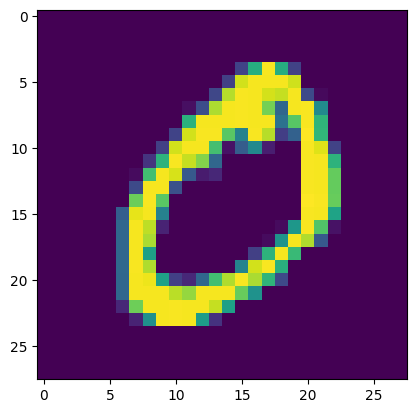

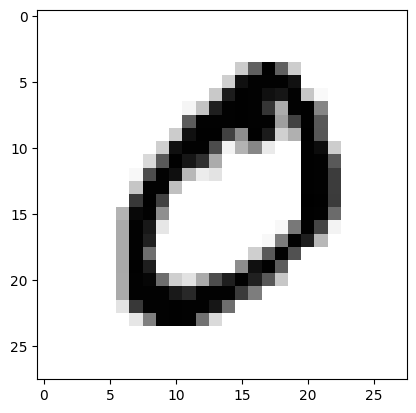

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test , y_test) = mnist.load_data()

x_train.shape

import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1] , cmap = plt.cm.binary)

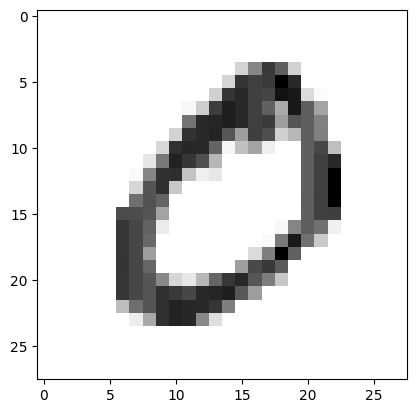

In [5]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[1] , cmap = plt.cm.binary)

In [6]:
import numpy as np
img_size = 28
x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile model that we have created for handwritten digit recognition project
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 10 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.8204 - loss: 0.5741 - val_accuracy: 0.9745 - val_loss: 0.0834
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9698 - loss: 0.0978 - val_accuracy: 0.9815 - val_loss: 0.0593
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9800 - loss: 0.0651 - val_accuracy: 0.9851 - val_loss: 0.0526
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9858 - val_loss: 0.0486
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9861 - loss: 0.0420 - val_accuracy: 0.9874 - val_loss: 0.0444
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9885 - val_loss: 0.0422
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9909 - loss: 0.0272 - val_accuracy: 0.9879 - val_loss: 0.0433
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9931 - loss: 0.0217 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0400
Test loss on 10,000 test samples 0.03432869166135788
Validation Accuracy on 10,000 samples 0.9901000261306763
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
4


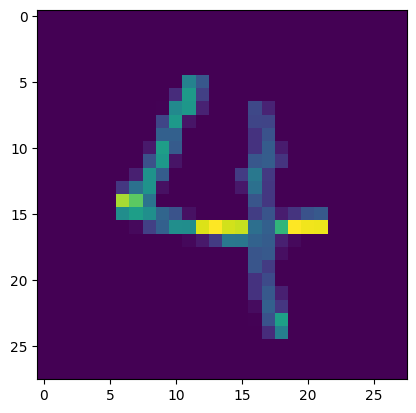

In [10]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

predictions = model.predict([x_tester])

print(np.argmax(predictions[24]))

plt.imshow(x_test[24])

In [11]:
model.save("digit_recognition_cnn_mode.keras")